In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline
sess = tf.Session()

In [2]:
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0.1,100)

In [15]:
#A = column of x-data and 1s. b=y-data
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [16]:
#convert to tensors
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [17]:
#x=(A^TA)^-1A^Tb
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)
solution_eval = sess.run(solution)

In [18]:
#extract the coefficients from the solution.
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('Slope: ' + str(slope))
print('y intercept: ' + str(y_intercept))

Slope: 0.9999999999999981
y intercept: -41.89271511230188


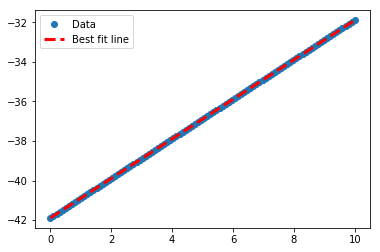

In [19]:
#plot graph
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r--', label='Best fit line', linewidth = 3)
plt.legend(loc='upper left')
plt.show()

# Decomposition Method LL'x = b instead of Ax=b (to make it less complicated)

In [22]:
#reset graph
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [23]:
#create data
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100)
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [24]:
#find Cholesky decomposition of our square matrix
tA_A = tf.matmul(tf.transpose(A_tensor),A_tensor)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A_tensor),b)
sol1 = tf.matrix_solve(L, tA_b)
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

In [25]:
#extract the coefficients
solution_eval = sess.run(sol2)
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('Slope: ' + str(slope))
print('y_intercept : ' + str(y_intercept))

Slope: 0.9570381822647025
y_intercept : 0.02432741327765319


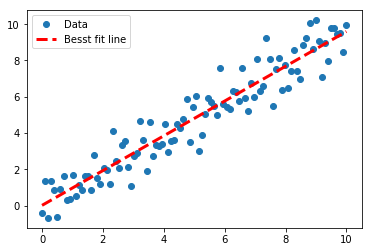

In [26]:
#plot
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label = 'Data')
plt.plot(x_vals, best_fit, 'r--', label='Besst fit line', linewidth = 3)
plt.legend(loc='upper left')
plt.show()